# Latin Hypercube Sampling using UQpy

Author: Dimitris G. Giovanis,  
Date: May 13, 2020  
UQpy Version 3.0

In [1]:
#Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, 
# but also need to import the LHS class from UQpy.
from UQpy.SampleMethods import LHS
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Import the necessary Distributions from Distribution class to create the Distribution object
# We are going to run LHS for two uniform U(0,1) random variables.
from UQpy.Distributions import Uniform
dist1 = Uniform(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.


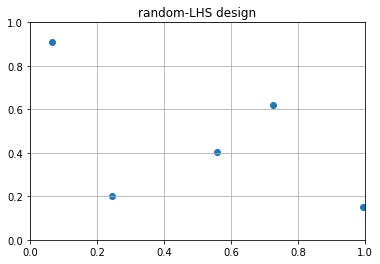

In [3]:
x1c = LHS(dist_object=[dist1, dist2], nsamples=5, random_state=np.random.RandomState(789), verbose=True)


fig, ax = plt.subplots()
plt.title('random-LHS design')
plt.scatter(x1c.samples[:, 0], x1c.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

UQpy: Running Latin Hypercube sampling...
UQpy: Achieved maximum distance of  0.38026766226135317
Successful execution of LHS design.
[[0.13929384 0.08462129]
 [0.25722787 0.53696595]
 [0.44537029 0.8784235 ]
 [0.94389379 0.69618638]
 [0.71026295 0.39615284]]


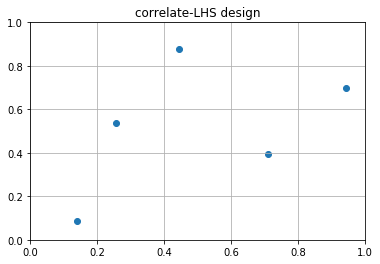

In [4]:
x1a = LHS(dist_object=[dist1, dist2], criterion='maximin', random_state=np.random.RandomState(123), nsamples=5, verbose=True)
print(x1a.samples)

fig, ax = plt.subplots()
plt.title('correlate-LHS design')
plt.scatter(x1a.samples[:, 0], x1a.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()


UQpy: Running Latin Hypercube sampling...
UQpy: Achieved maximum distance of  0.3772127811736133
Successful execution of LHS design.
[[0.23839679 0.73074016]
 [0.84145635 0.42613575]
 [0.01020378 0.35352738]
 [0.66091747 0.87697016]
 [0.58228225 0.00262668]]


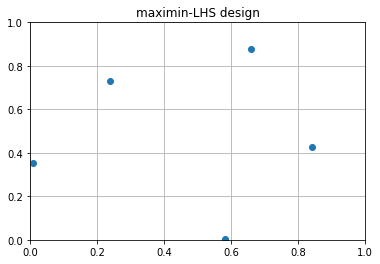

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.
[[0.55875577 0.40494539]
 [0.72488394 0.622208  ]
 [0.99508209 0.15177718]
 [0.24604942 0.20212401]
 [0.06466696 0.90762988]]


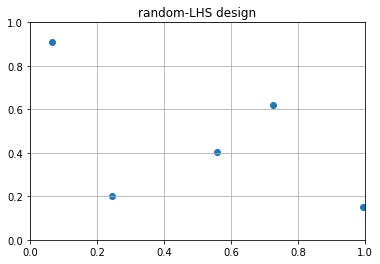

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.


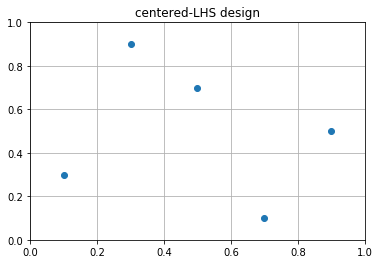

[[0.1 0.3]
 [0.7 0.1]
 [0.9 0.5]
 [0.3 0.9]
 [0.5 0.7]]


In [5]:



x1b = LHS(dist_object=[dist1, dist2], criterion='maximin', metric='chebyshev', nsamples=5, verbose=True)
print(x1b.samples)

fig, ax = plt.subplots()
plt.title('maximin-LHS design')
plt.scatter(x1b.samples[:, 0], x1b.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()


x1c = LHS(dist_object=[dist1, dist2], nsamples=5, random_state=np.random.RandomState(789), verbose=True)
print(x1c.samples)

fig, ax = plt.subplots()
plt.title('random-LHS design')
plt.scatter(x1c.samples[:, 0], x1c.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()


x1d = LHS(dist_object=[dist1, dist2], criterion='centered',  nsamples=5, verbose=True)

fig, ax = plt.subplots()
plt.title('centered-LHS design')
plt.scatter(x1d.samples[:, 0], x1d.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

print(x1d.samples)

In [6]:
from UQpy.Distributions import Uniform, Normal
dist1 = Normal(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

x2a = LHS(dist_object=[dist1, dist2], criterion='centered', random_state=np.random.RandomState(45), nsamples=5, verbose=True)
print('LHS design:', x2a.samples)

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.
LHS design: [[ 0.52440051  0.5       ]
 [ 0.          0.3       ]
 [ 1.28155157  0.7       ]
 [-0.52440051  0.1       ]
 [-1.28155157  0.9       ]]


In [8]:
# Run LHS for a user-defined criterion and metric
#def distance(x):
#    return x+1
from scipy.spatial.distance import pdist

def criterion(samples, random_state=None):
    lhs_samples = np.zeros_like(samples)
    for j in range(samples.shape[1]):
        order = np.random.permutation(samples.shape[0])
        lhs_samples[:, j] = samples[order, j]
    return lhs_samples

dist1 = Uniform(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

x1e = LHS(dist_object=[dist1, dist2], nsamples=5, random_state=np.random.RandomState(123), metric=pdist, criterion=criterion, verbose=True)
print(x1e.samples)

x1d = LHS(dist_object=[dist1, dist2], nsamples=5, verbose=True)
print(x1d.samples)

UQpy: Running Latin Hypercube sampling...


TypeError: criterion() got an unexpected keyword argument 'metric'

In [ ]:
# We are going to run LHS for a Joint distribution.
from UQpy.Distributions import Normal, Lognormal, JointInd
marginals = [Normal(loc=2., scale=2.), Lognormal(s=1., loc=0., scale=np.exp(5))]
dist = JointInd(marginals=marginals)

x2 = LHS(dist_object=dist, nsamples=5, criterion='maximin', random_state=np.random.RandomState(123), verbose=True)
print(x2.samples)